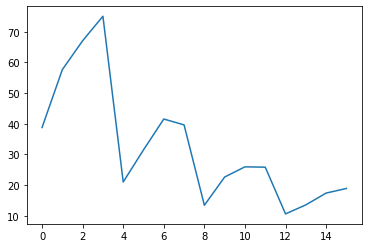

In [14]:
# Fit a model to some data
# Model is:
#    prediction = M0 * exp(-TE/T2)*(1-exp(-TR/T1))
#    where M0,T1,T2 are unknown parameters and TE/TR are experimental parameters


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


TEs = np.array([10,40,60,80]) # TE values in ms
TRs = np.array([.5,1,1.5,2])  # TR in seconds

# All combinations of TEs/TRs
combinations = np.array([(x,y) for x in TEs for y in TRs])
TEs,TRs = combinations[:,0],combinations[:,1]

# function for our model
def forward(p):
    M0,T1,T2 = p
    return M0*np.exp(-TEs/T2)*(1-np.exp(-TRs/T1))

# simulate data using model 
true_p = [100,.8,50]
data   = forward(true_p)
data   = data + np.random.randn(data.size)



In [65]:
# Now for the fitting
# we need a cost function:

def cf(p):
    pred = forward(p)
    return np.mean((pred-data)**2)/2
 
# always a good idea to calculate gradient
def forward_deriv(p):
    M0,T1,T2 = p
    E1,E2    = np.exp(-TEs/T2),np.exp(-TRs/T1)
    
    dfdM0 = E2*(1-E1)
    dfdT1 = M0*E2*(-E1/T1**2)
    dfdT2 = M0*(E2/T2**2)*(1-E1)
    return np.array([dfdM0,dfdT1,dfdT2])

def forward_deriv2(p):
    M0,T1,T2 = p
    E1,E2    = np.exp(-TEs/T2),np.exp(-TRs/T1)
    
    dfdM0dM0 = 0
    dfdM0dT1 = -E2
    dfdM0dT2 = (1-E1)

    dfdT1dM0 = E2*(-E1/T1**2)
    dfdT1dT1 = M0*E2*(-E1/T1**4)
    dfdT1dT2 = M0*(E2/T2**4)*(1-E1)
 
    dfdT2dM0 = (E2/T2**2)*(1-E1)
    dfdT2dT1 = M0*(E2/T2**2)*(1-E1/T1**2)
    dfdT2dT2 = M0*(E2/T2**4)*(1-E1)

    return np.array([dfdM0dM0,dfdM0dT1,dfdM0dT2],[dfdT1dM0,dfdT1dT1,dfdT1dT2],[dfdT2dM0,dfdT2dT1,dfdT2dT2])

def gradient(p):
    pred  = forward(p)
    deriv = forward_deriv(p)
    return np.mean( deriv * (pred-data)[None,:],axis=1)

def hess(p):
    pred   = forward(p)
    deriv  = forward_deriv(p)
    d2Fdp2 = forward_deriv2(p)
    
    deriv*deriv


# get ready to minimize
p0 = [200,1,70] # some random guess
method = 'Nelder-Mead'

arguments = {'x0':p0,'method':method,'jac':gradient}

result = minimize(cf,**arguments)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


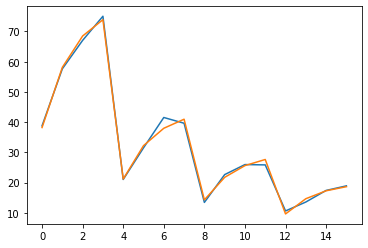

In [66]:
plt.plot(data)
plt.plot(forward(result.x))

In [69]:
np.mean(forward_deriv(p0),axis=1).shape

(3,)

In [55]:
true_p

[100, 0.8, 50]